<a href="https://colab.research.google.com/github/ChrysKoum/NASA-Space-Apps-Challenge-2023/blob/main/Programs/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read all the clean data of the years 2019-2022 and concatenate to one

In [22]:
import pandas as pd
data19 = pd.read_csv('wind_def_2019_clean_month_plus.txt', delimiter=r"\s+",index_col=False)#delimiter=r"\s+"
data20 = pd.read_csv('wind_def_2020_clean_month_plus.txt', delimiter=r"\s+",index_col=False)
data21 = pd.read_csv('wind_def_2021_clean_month_plus.txt', delimiter=r"\s+",index_col=False)
data22 = pd.read_csv('wind_def_2022_clean_month_plus.txt', delimiter=r"\s+",index_col=False)


# concatenate the data of all years
data = pd.concat([data19, data20,data21,data22], ignore_index=True)

In [2]:
data

,Year,Hour,Minute,Bx,By,Bz,Flow_Speed,Proton_Density,Temperature,Month,day
0,2019,0,0,-3.7,2.0,2.7,451.0,5.3,57803.0,1.0,1.0
1,2019,0,1,-3.6,2.3,2.6,451.3,5.3,57901.0,1.0,1.0
2,2019,0,2,-3.3,2.4,2.6,454.7,5.2,58969.0,1.0,1.0
3,2019,0,3,-3.4,2.2,2.5,452.3,5.8,61880.0,1.0,1.0
4,2019,0,4,-3.6,2.2,2.4,451.4,6.0,62924.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2109595,2022,23,55,-4.3,3.0,0.7,569.6,2.9,86049.0,12.0,31.0
2109596,2022,23,56,-3.9,3.6,-0.0,573.9,2.7,77893.0,12.0,31.0
2109597,2022,23,57,-3.1,3.9,0.5,586.3,2.9,90625.0,12.0,31.0
2109598,2022,23,58,-4.2,2.8,-0.2,563.3,2.3,54870.0,12.0,31.0


In [23]:
data['Time'] = pd.to_datetime(data[['Year', 'Month', 'day', 'Hour','Minute']])
#data=data.drop(['Year', 'Month', 'day', 'Hour','Minute'], axis=1)

In [10]:
data

,Year,Hour,Minute,Bx,By,Bz,Flow_Speed,Proton_Density,Temperature,Month,day,Time
0,2019,0,0,-3.7,2.0,2.7,451.0,5.3,57803.0,1.0,1.0,2019-01-01 00:00:00
1,2019,0,1,-3.6,2.3,2.6,451.3,5.3,57901.0,1.0,1.0,2019-01-01 00:01:00
2,2019,0,2,-3.3,2.4,2.6,454.7,5.2,58969.0,1.0,1.0,2019-01-01 00:02:00
3,2019,0,3,-3.4,2.2,2.5,452.3,5.8,61880.0,1.0,1.0,2019-01-01 00:03:00
4,2019,0,4,-3.6,2.2,2.4,451.4,6.0,62924.0,1.0,1.0,2019-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2109595,2022,23,55,-4.3,3.0,0.7,569.6,2.9,86049.0,12.0,31.0,2022-12-31 23:55:00
2109596,2022,23,56,-3.9,3.6,-0.0,573.9,2.7,77893.0,12.0,31.0,2022-12-31 23:56:00
2109597,2022,23,57,-3.1,3.9,0.5,586.3,2.9,90625.0,12.0,31.0,2022-12-31 23:57:00
2109598,2022,23,58,-4.2,2.8,-0.2,563.3,2.3,54870.0,12.0,31.0,2022-12-31 23:58:00


# Function to plot Bz in a period of time and calculate statistical measures

In [31]:
import matplotlib.pyplot as plt
import calendar

def plotBz(data,period):
  plt.plot(data['Time'], data['Bz'], color='red')
  plt.ylabel('Bz')
  plt.title("Bz "+period)
  # Calculate mean, standard deviation, minimum, and maximum
  mean_value = data['Bz'].mean()
  std_value = data['Bz'].std()
  min_value = data['Bz'].min()
  max_value = data['Bz'].max()

  # Calculate the 99th percentile (quantile)
  percentile_99 = data['Bz'].quantile(0.99)

  # Create a line plot for the  data
  plt.axhline(percentile_99, color='blue', linestyle='--', label='99th Percentile')
  plt.axhline(-percentile_99, color='blue', linestyle='--', label='99th Percentile')

  # Show the calculated statistics
  print(f'Mean: {mean_value:.2f}')
  print(f'Standard Deviation: {std_value:.2f}')
  print(f'Minimum: {min_value:.2f}')
  print(f'Maximum: {max_value:.2f}')
  print(f'99th Percentile: {percentile_99:.2f}')
  plt.show()

# Plots for all the years,each year seperately,and each month for the years seperately

		 Bz for 2019-2022
Mean: -0.14
Standard Deviation: 2.90
Minimum: -26.70
Maximum: 29.90
99th Percentile: 7.80


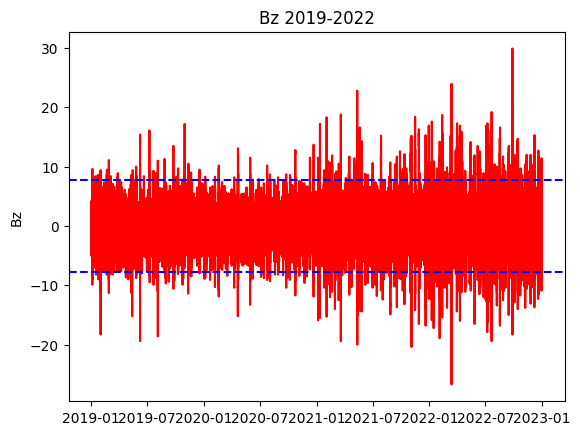

		 Bz for 2019
Mean: -0.18
Standard Deviation: 2.36
Minimum: -19.40
Maximum: 17.20
99th Percentile: 6.20


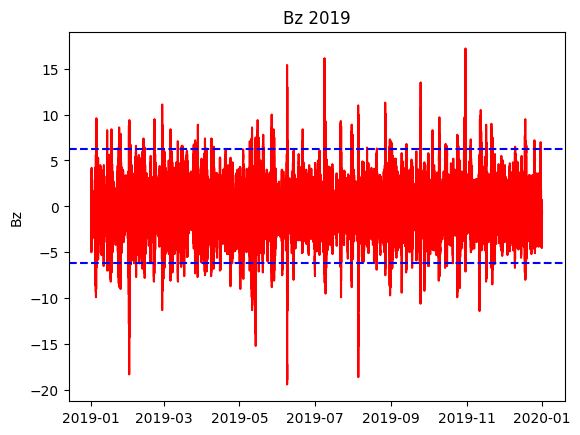

		 Bz for 2020
Mean: -0.24
Standard Deviation: 2.33
Minimum: -15.20
Maximum: 13.70
99th Percentile: 5.50


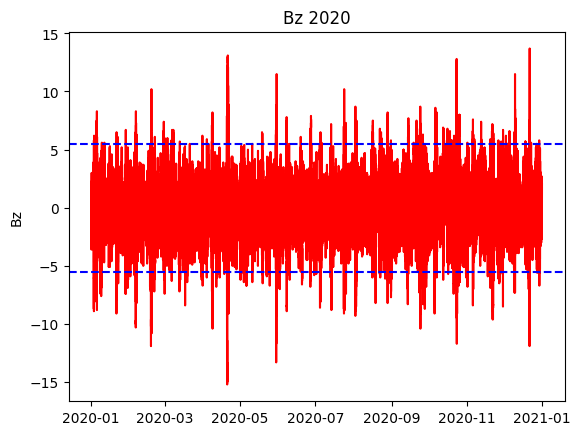

		 Bz for 2021
Mean: -0.09
Standard Deviation: 2.93
Minimum: -20.40
Maximum: 22.80
99th Percentile: 8.00


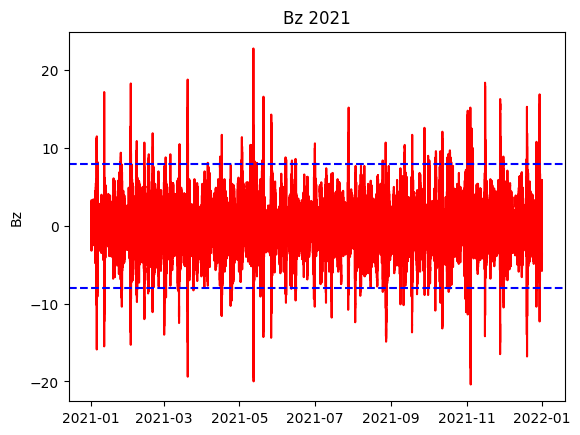

		 Bz for 2022
Mean: -0.04
Standard Deviation: 3.75
Minimum: -26.70
Maximum: 29.90
99th Percentile: 10.60


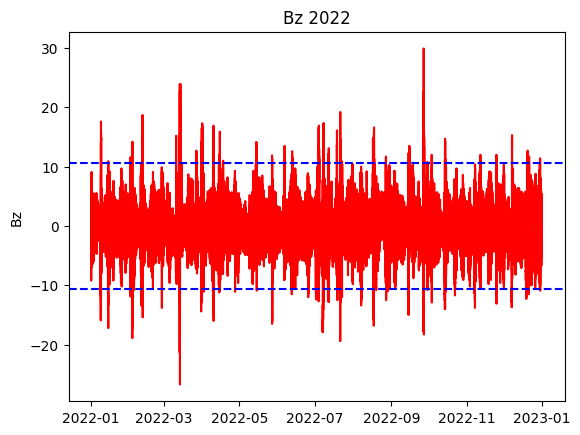

		 Bz for January of years 2019-2022
Mean: -0.24
Standard Deviation: 2.42
Minimum: -18.30
Maximum: 9.60
99th Percentile: 6.30


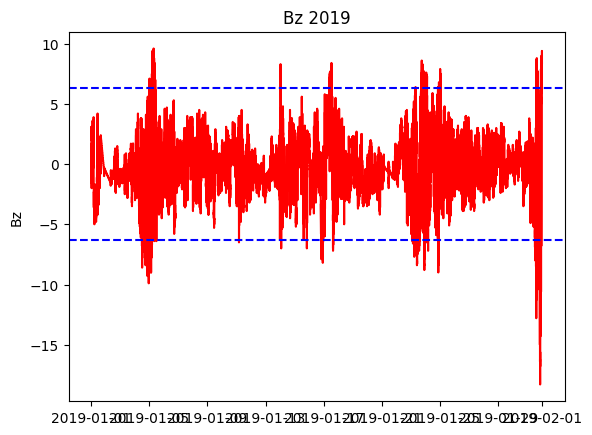

Mean: -0.37
Standard Deviation: 2.18
Minimum: -9.10
Maximum: 8.30
99th Percentile: 5.10


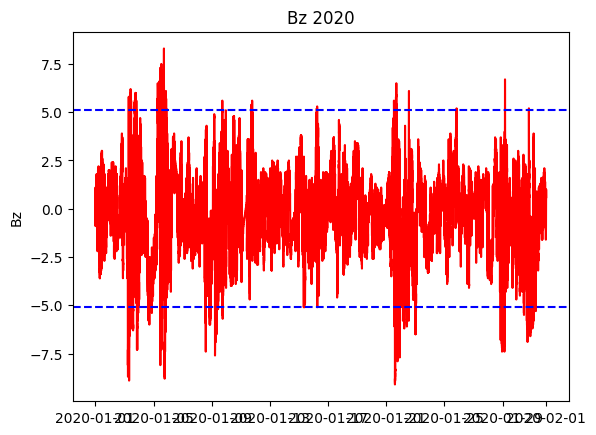

Mean: -0.20
Standard Deviation: 2.25
Minimum: -15.90
Maximum: 17.20
99th Percentile: 5.40


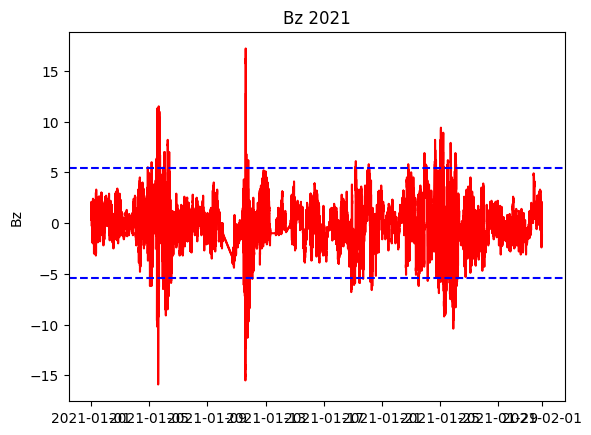

Mean: -0.24
Standard Deviation: 3.16
Minimum: -17.20
Maximum: 17.60
99th Percentile: 7.80


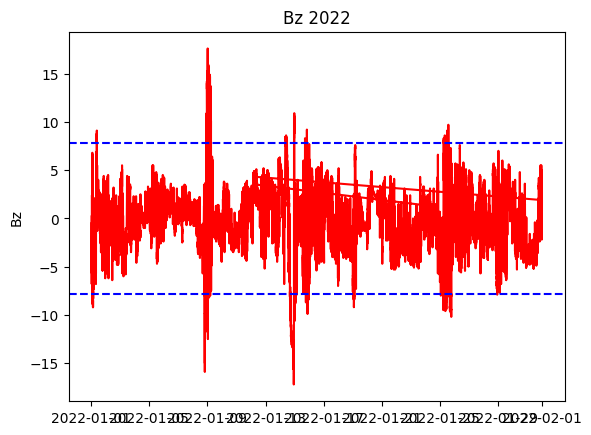

		 Bz for February of years 2019-2022
Mean: -0.28
Standard Deviation: 2.46
Minimum: -11.30
Maximum: 11.10
99th Percentile: 5.70


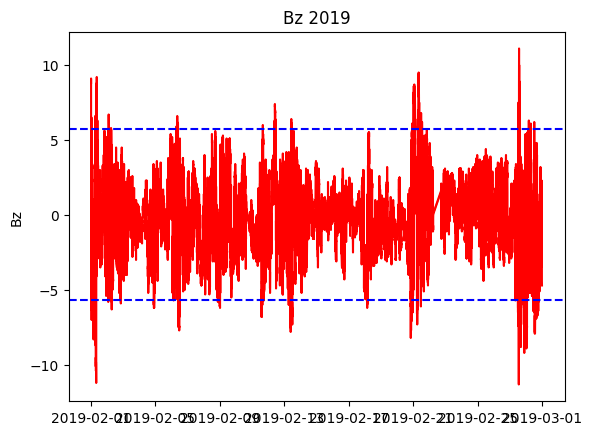

Mean: -0.55
Standard Deviation: 2.24
Minimum: -11.90
Maximum: 10.20
99th Percentile: 4.90


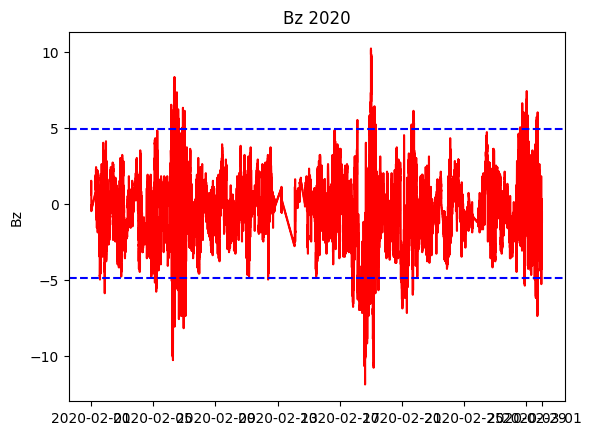

Mean: -0.39
Standard Deviation: 2.91
Minimum: -15.30
Maximum: 18.30
99th Percentile: 6.90


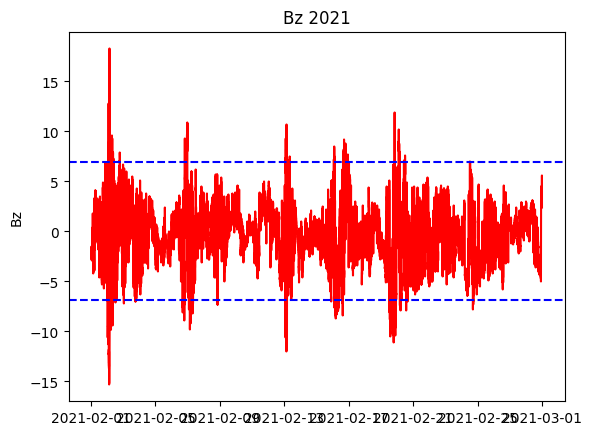

Mean: -0.32
Standard Deviation: 4.07
Minimum: -18.90
Maximum: 18.70
99th Percentile: 11.50


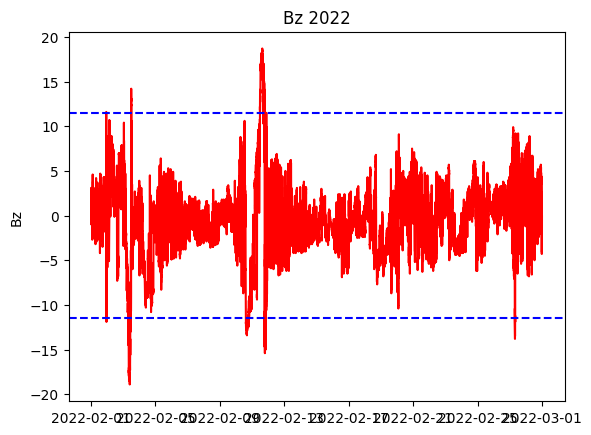

		 Bz for March of years 2019-2022
Mean: -0.13
Standard Deviation: 2.51
Minimum: -8.20
Maximum: 8.90
99th Percentile: 6.00


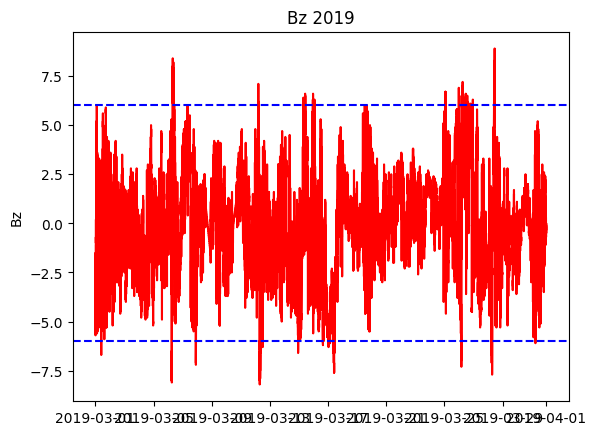

Mean: -0.38
Standard Deviation: 2.15
Minimum: -8.40
Maximum: 6.70
99th Percentile: 5.60


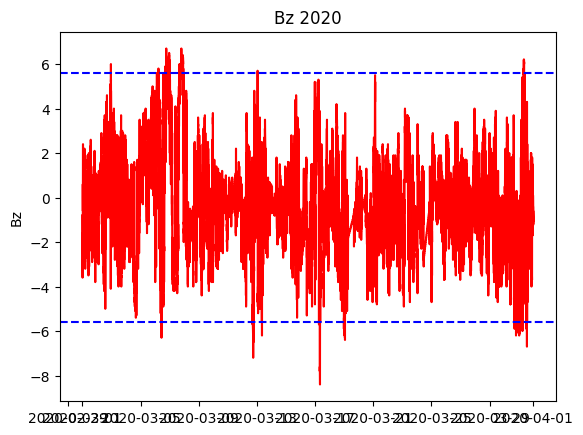

Mean: -0.54
Standard Deviation: 2.87
Minimum: -19.40
Maximum: 18.80
99th Percentile: 6.50


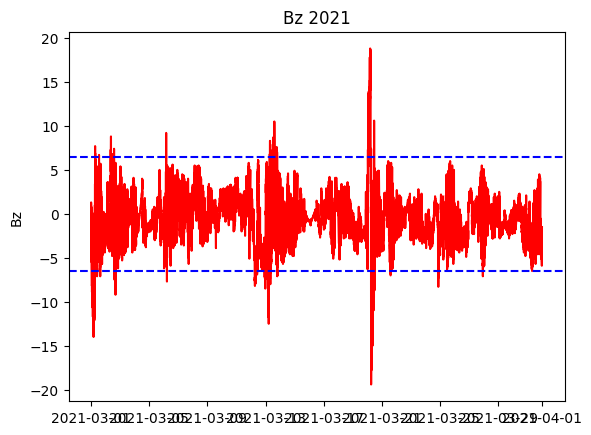

Mean: 0.47
Standard Deviation: 4.69
Minimum: -26.70
Maximum: 23.90
99th Percentile: 19.40


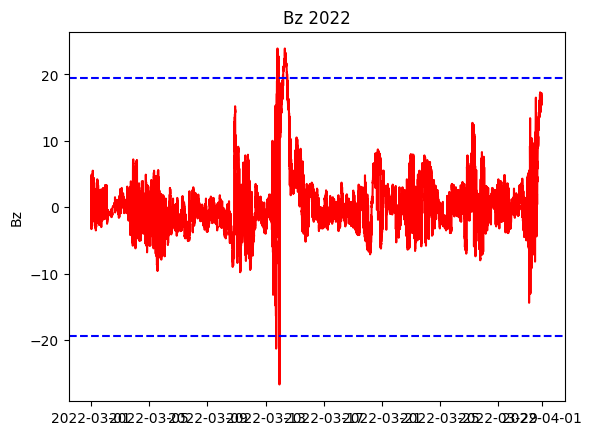

		 Bz for April of years 2019-2022
Mean: -0.60
Standard Deviation: 2.21
Minimum: -8.70
Maximum: 7.40
99th Percentile: 4.60


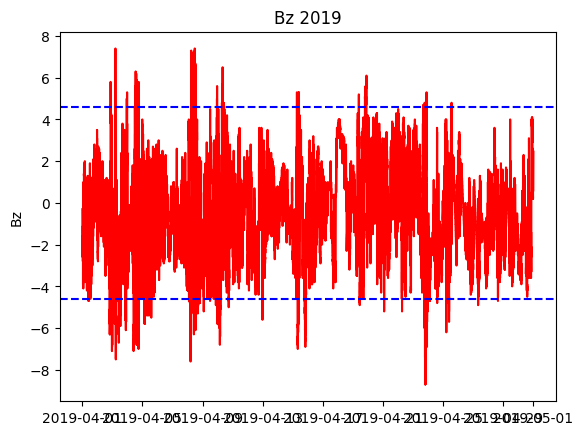

Mean: -0.38
Standard Deviation: 2.76
Minimum: -15.20
Maximum: 13.10
99th Percentile: 11.30


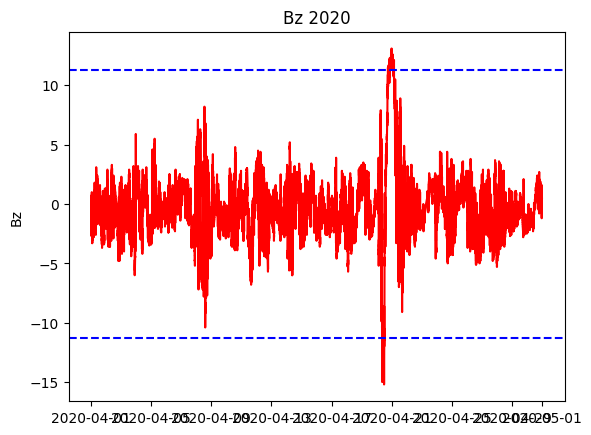

Mean: -0.22
Standard Deviation: 2.79
Minimum: -11.60
Maximum: 11.70
99th Percentile: 7.50


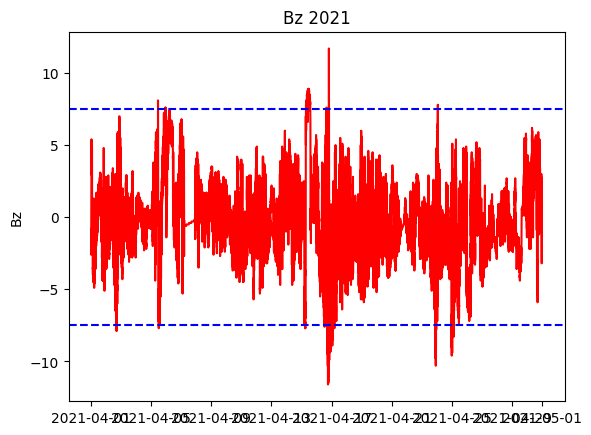

Mean: 0.08
Standard Deviation: 3.77
Minimum: -16.00
Maximum: 16.90
99th Percentile: 11.10


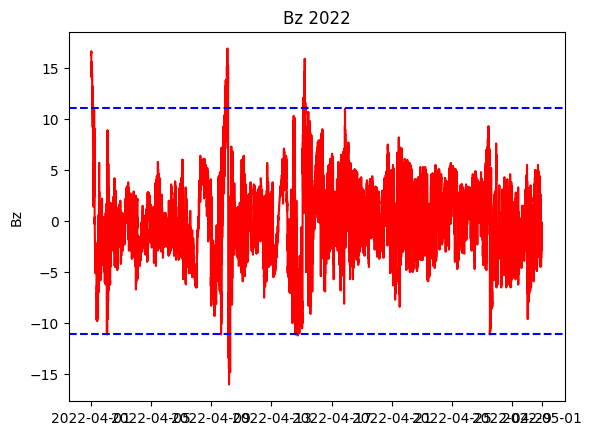

		 Bz for May of years 2019-2022
Mean: -0.22
Standard Deviation: 2.99
Minimum: -15.20
Maximum: 10.00
99th Percentile: 7.20


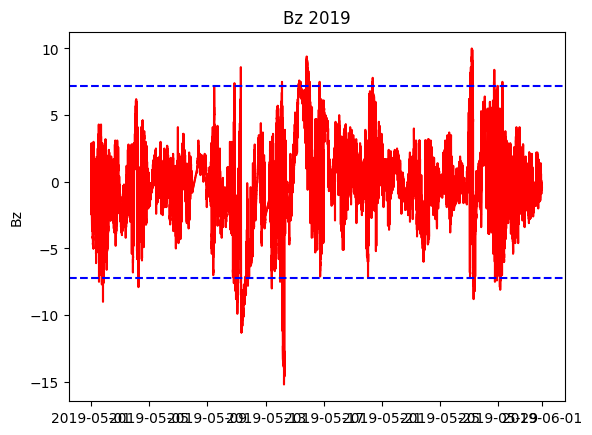

Mean: -0.24
Standard Deviation: 2.31
Minimum: -13.30
Maximum: 11.50
99th Percentile: 4.80


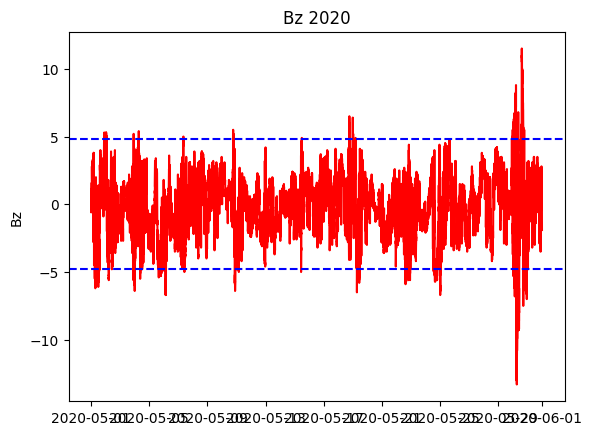

Mean: 0.51
Standard Deviation: 3.38
Minimum: -20.00
Maximum: 22.80
99th Percentile: 9.80


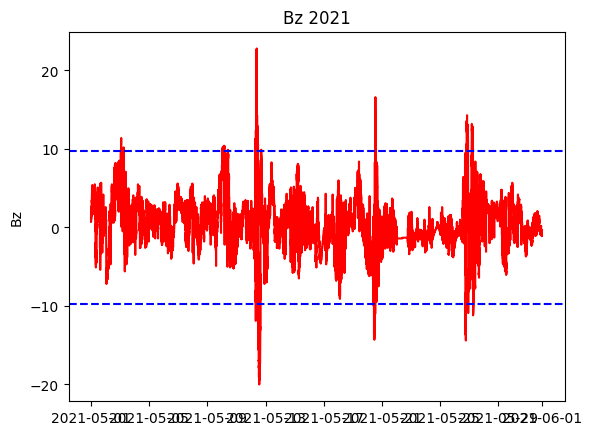

Mean: -0.32
Standard Deviation: 3.07
Minimum: -16.50
Maximum: 14.10
99th Percentile: 7.60


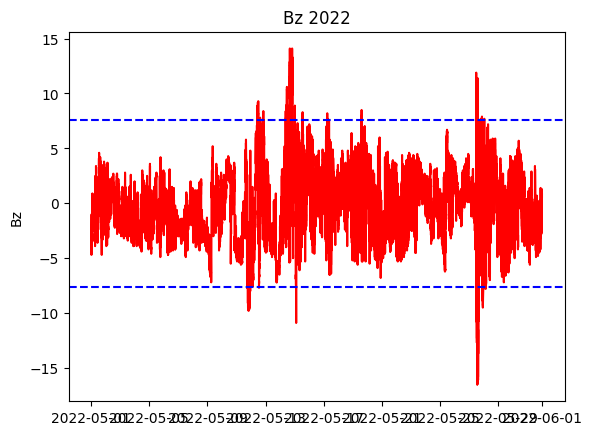

		 Bz for June of years 2019-2022
Mean: -0.30
Standard Deviation: 2.10
Minimum: -19.40
Maximum: 15.40
99th Percentile: 4.60


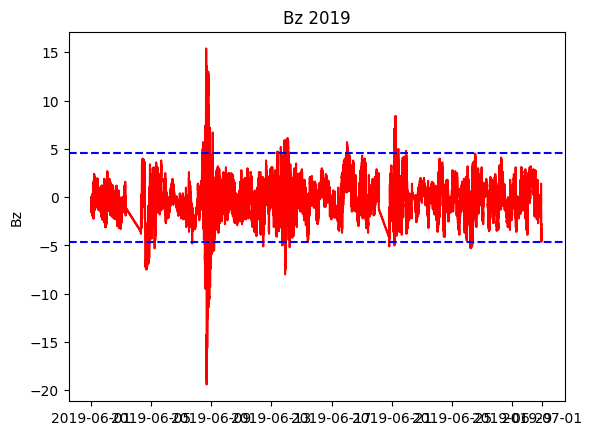

Mean: -0.34
Standard Deviation: 2.05
Minimum: -8.90
Maximum: 7.90
99th Percentile: 4.60


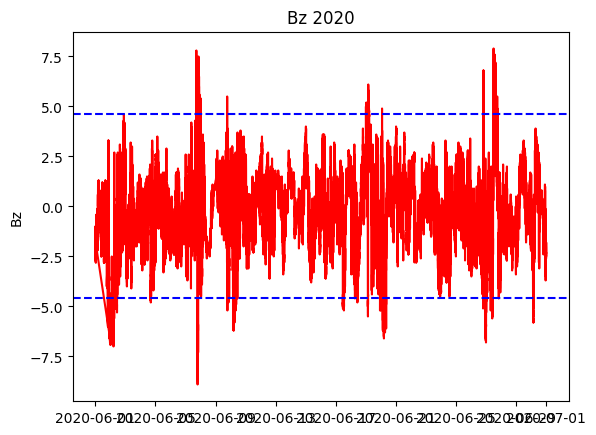

Mean: 0.04
Standard Deviation: 2.44
Minimum: -9.90
Maximum: 8.80
99th Percentile: 6.26


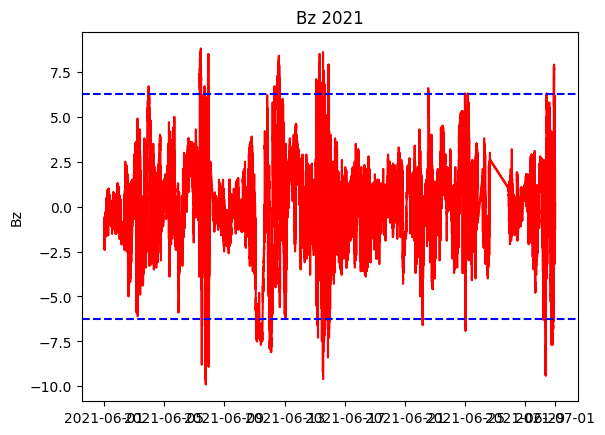

Mean: -0.42
Standard Deviation: 3.06
Minimum: -12.00
Maximum: 13.50
99th Percentile: 7.20


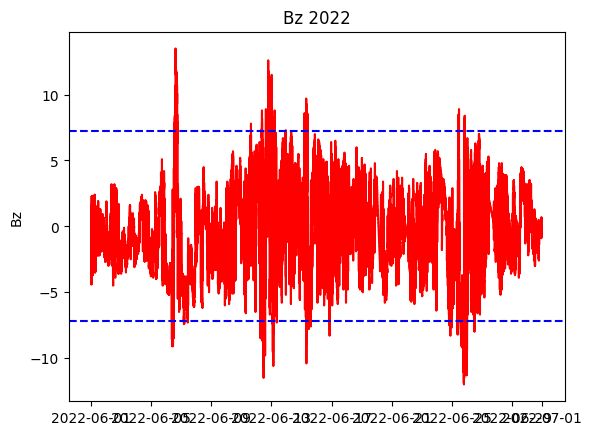

		 Bz for July of years 2019-2022
Mean: -0.20
Standard Deviation: 2.30
Minimum: -9.90
Maximum: 16.10
99th Percentile: 6.70


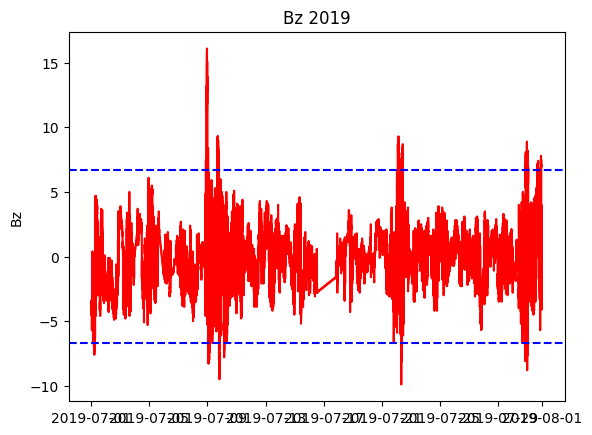

Mean: -0.29
Standard Deviation: 2.13
Minimum: -9.10
Maximum: 10.20
99th Percentile: 4.60


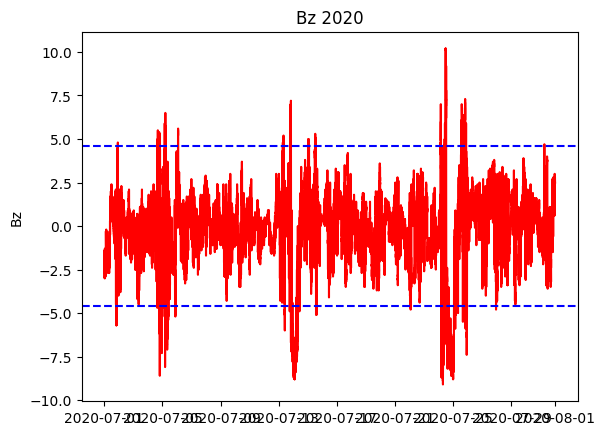

Mean: 0.01
Standard Deviation: 2.70
Minimum: -11.80
Maximum: 15.20
99th Percentile: 6.90


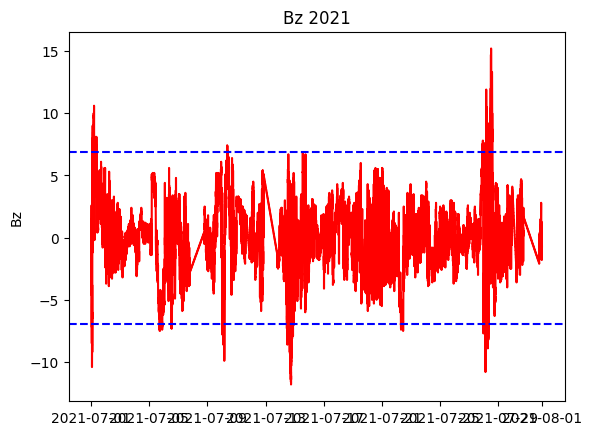

Mean: 0.01
Standard Deviation: 4.49
Minimum: -19.40
Maximum: 19.20
99th Percentile: 12.70


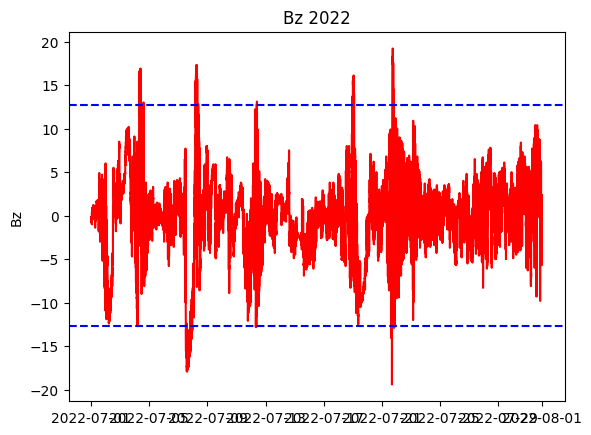

		 Bz for August of years 2019-2022
Mean: -0.04
Standard Deviation: 2.11
Minimum: -18.60
Maximum: 11.30
99th Percentile: 5.30


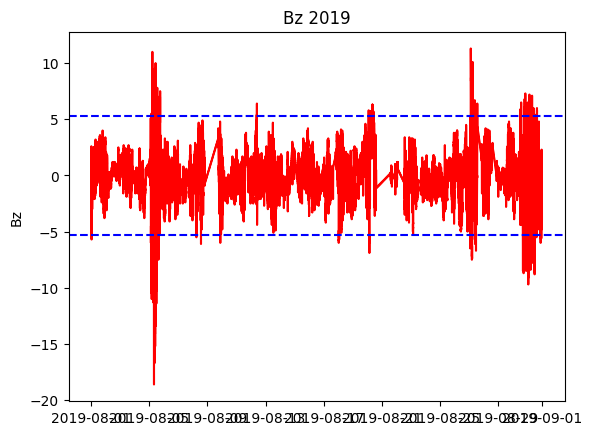

Mean: -0.19
Standard Deviation: 2.32
Minimum: -9.30
Maximum: 8.70
99th Percentile: 5.40


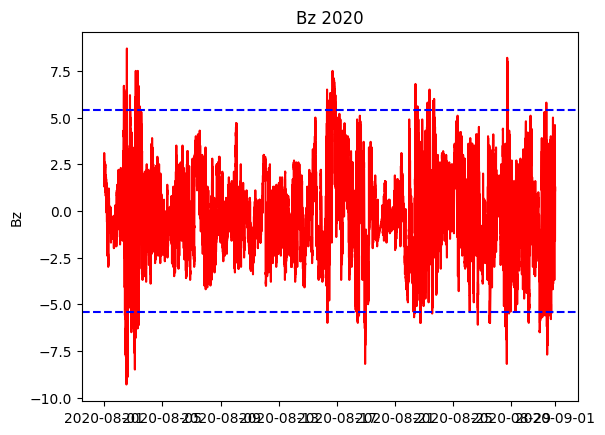

Mean: -0.65
Standard Deviation: 3.08
Minimum: -14.90
Maximum: 10.70
99th Percentile: 5.70


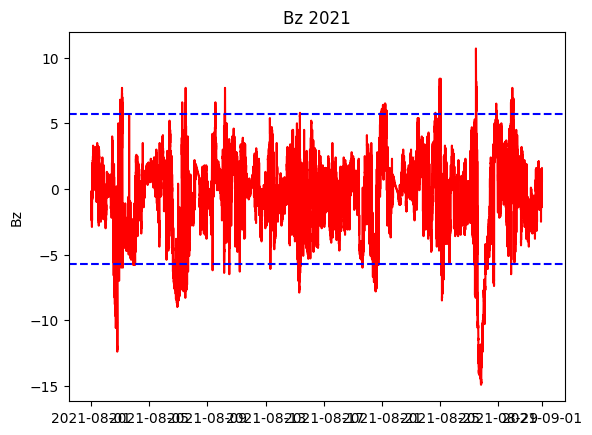

Mean: 0.57
Standard Deviation: 3.52
Minimum: -16.80
Maximum: 16.60
99th Percentile: 9.90


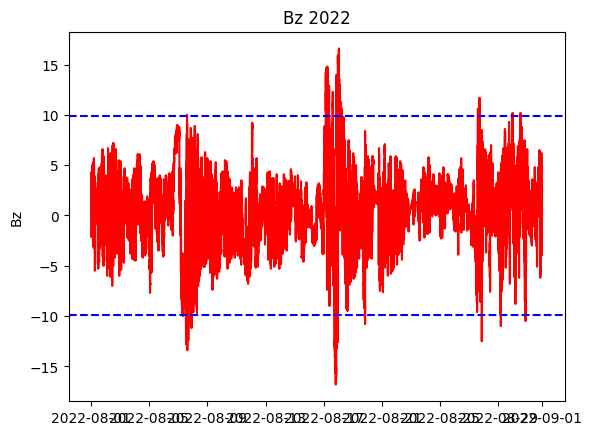

		 Bz for September of years 2019-2022
Mean: -0.40
Standard Deviation: 2.26
Minimum: -10.60
Maximum: 13.50
99th Percentile: 5.20


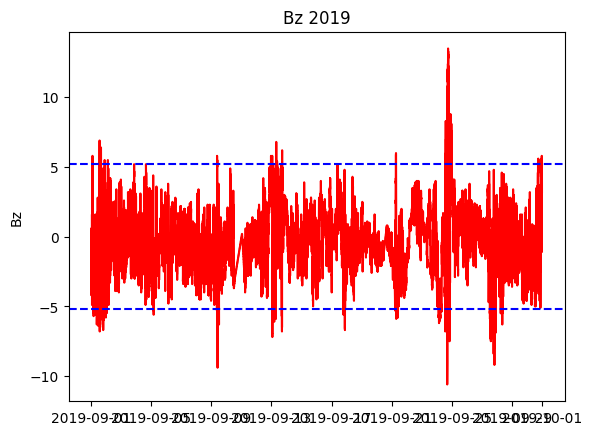

Mean: -0.50
Standard Deviation: 2.34
Minimum: -10.40
Maximum: 8.70
99th Percentile: 5.30


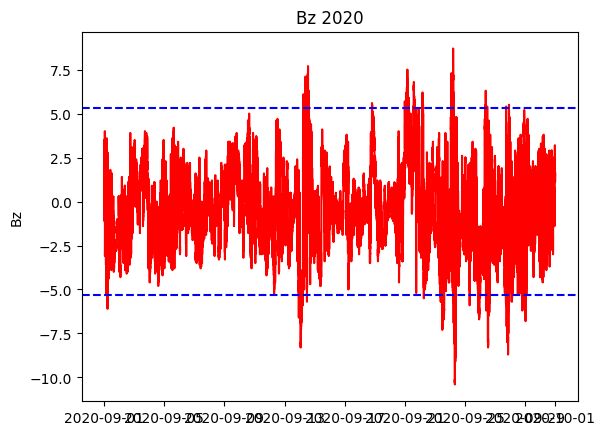

Mean: 0.12
Standard Deviation: 2.87
Minimum: -13.70
Maximum: 12.60
99th Percentile: 8.70


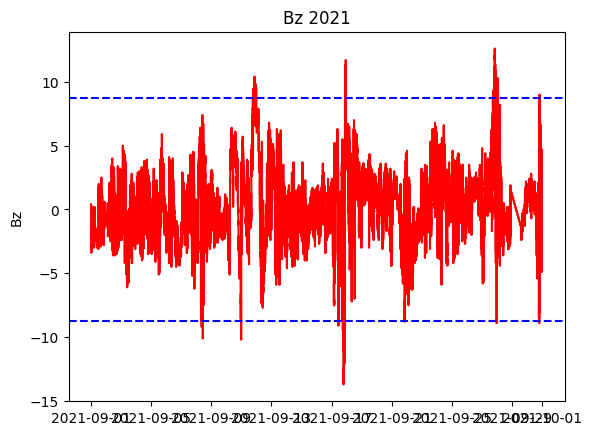

Mean: 0.28
Standard Deviation: 3.95
Minimum: -18.30
Maximum: 29.90
99th Percentile: 12.00


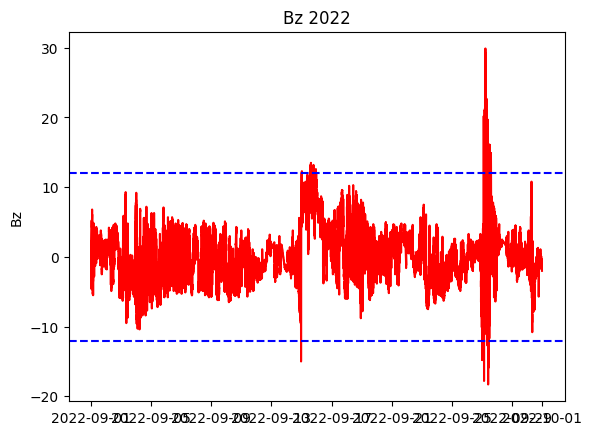

		 Bz for October of years 2019-2022
Mean: -0.17
Standard Deviation: 2.41
Minimum: -9.90
Maximum: 17.20
99th Percentile: 6.40


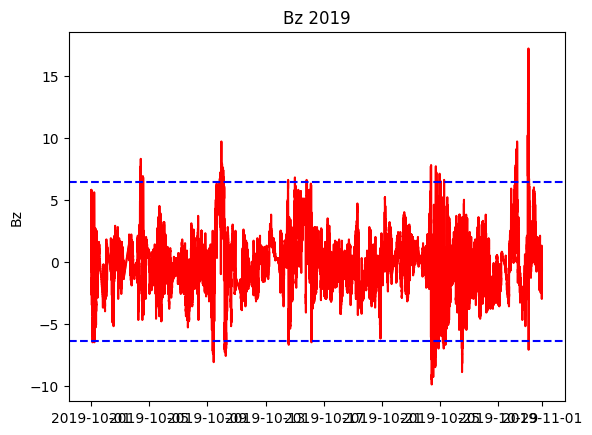

Mean: 0.25
Standard Deviation: 2.67
Minimum: -11.70
Maximum: 12.80
99th Percentile: 7.00


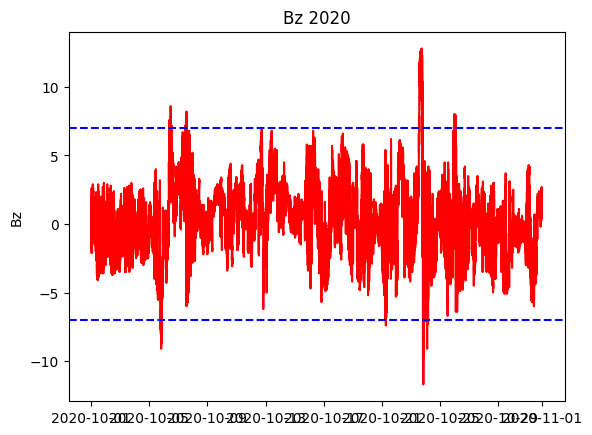

Mean: -0.17
Standard Deviation: 3.41
Minimum: -13.20
Maximum: 12.10
99th Percentile: 8.50


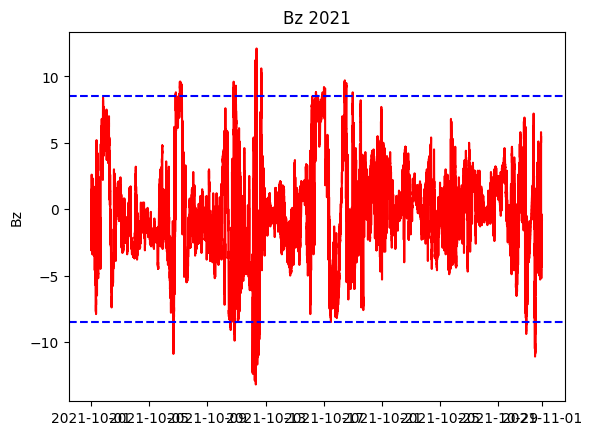

Mean: -0.14
Standard Deviation: 3.37
Minimum: -14.00
Maximum: 14.70
99th Percentile: 8.60


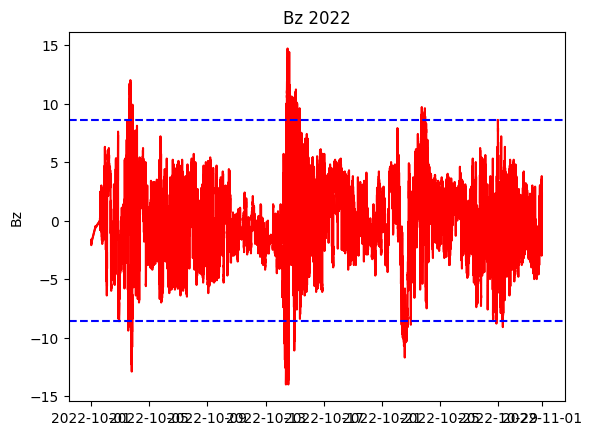

		 Bz for November of years 2019-2022
Mean: 0.29
Standard Deviation: 2.33
Minimum: -11.40
Maximum: 10.50
99th Percentile: 7.60


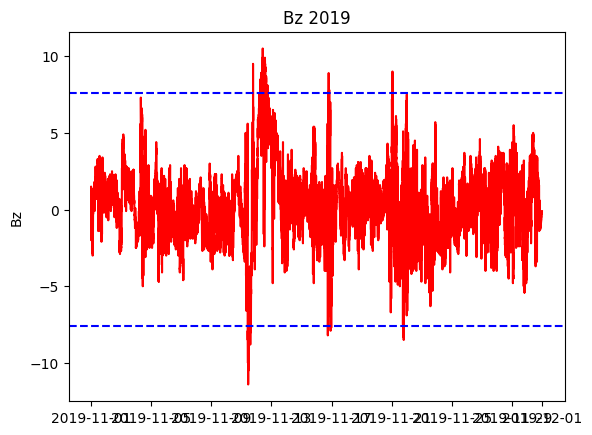

Mean: -0.01
Standard Deviation: 2.31
Minimum: -9.60
Maximum: 7.60
99th Percentile: 5.20


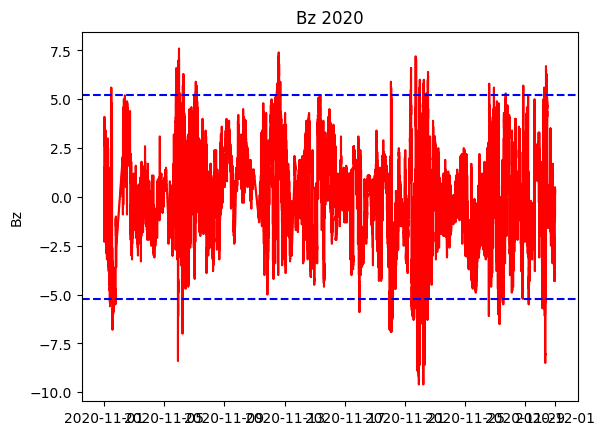

Mean: 0.39
Standard Deviation: 3.32
Minimum: -20.40
Maximum: 18.40
99th Percentile: 11.20


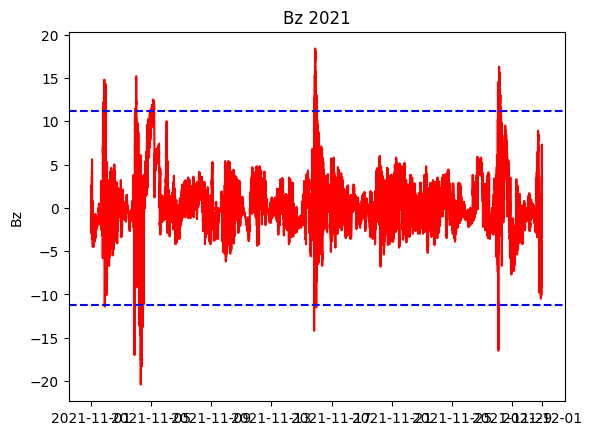

Mean: -0.06
Standard Deviation: 3.43
Minimum: -13.80
Maximum: 12.00
99th Percentile: 7.80


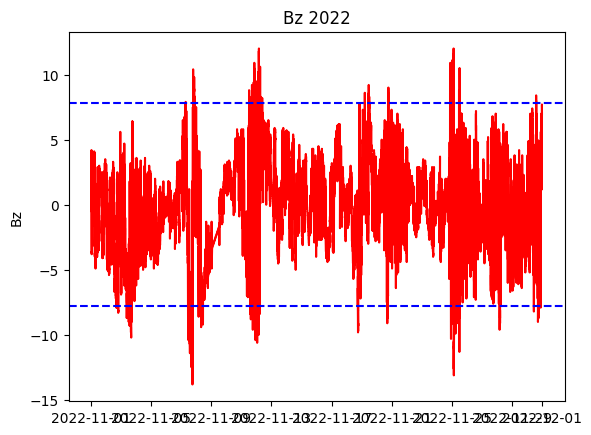

		 Bz for December of years 2019-2022
Mean: 0.13
Standard Deviation: 1.88
Minimum: -8.00
Maximum: 9.50
99th Percentile: 4.80


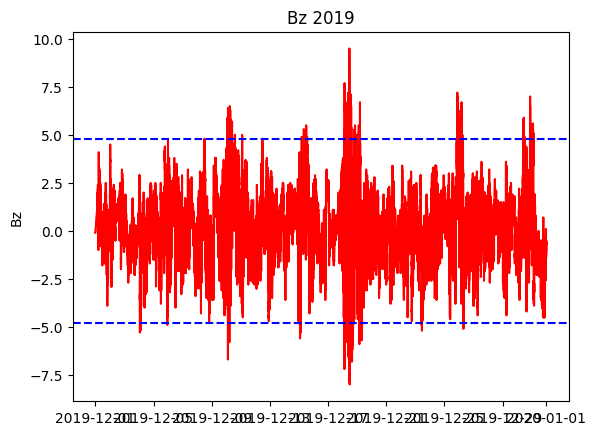

Mean: 0.10
Standard Deviation: 2.24
Minimum: -11.90
Maximum: 13.70
99th Percentile: 5.40


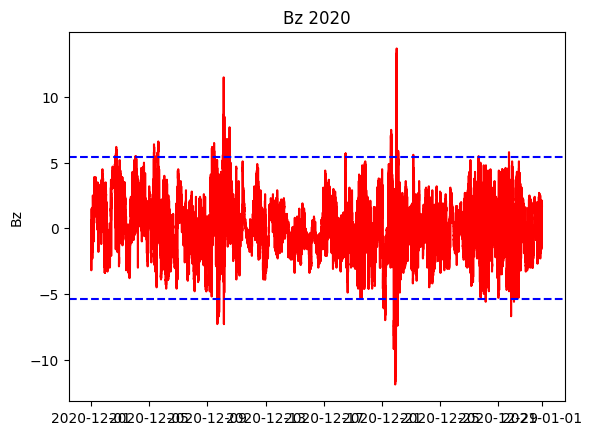

Mean: 0.00
Standard Deviation: 2.64
Minimum: -16.80
Maximum: 16.90
99th Percentile: 6.80


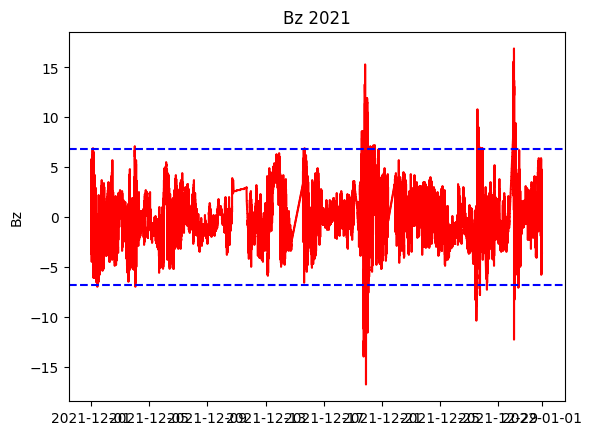

Mean: -0.44
Standard Deviation: 3.91
Minimum: -13.70
Maximum: 15.30
99th Percentile: 9.00


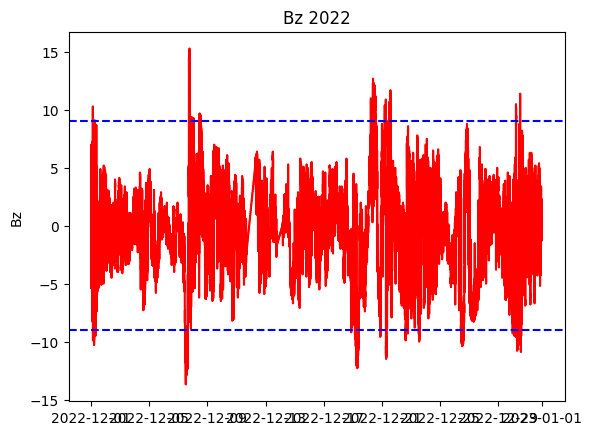

In [39]:

print("\t\t Bz for 2019-2022")
plotBz(data,"2019-2022")


print("\t\t Bz for 2019")
data19=data[data['Year']==2019]
plotBz(data19,"2019")


print("\t\t Bz for 2020")
data20=data[data['Year']==2020]
plotBz(data20,"2020")

print("\t\t Bz for 2021")
data21=data[data['Year']==2021]
plotBz(data21,"2021")

print("\t\t Bz for 2022")
data22=data[data['Year']==2022]
plotBz(data22,"2022")

for i in range(1,13):
    #print(calendar.month_name[i])
    datacopy = data[data['Month']==i]
    datacopy19 = datacopy[datacopy['Year']==2019]
    datacopy20 = datacopy[datacopy['Year']==2020]
    datacopy21 = datacopy[datacopy['Year']==2021]
    datacopy22 = datacopy[datacopy['Year']==2022]

    print("\t\t Bz for " + calendar.month_name[i] + " of years 2019-2022")



    # Plot Bz for 2019
    plotBz(datacopy19,"2019")

    # Plot Bz for 2020
    plotBz(datacopy20,"2020")

    # Plot Bz for 2021
    plotBz(datacopy21,"2021")


    # Plot Bz 2022
    plotBz(datacopy22,"2022")



# Plotting all the Data

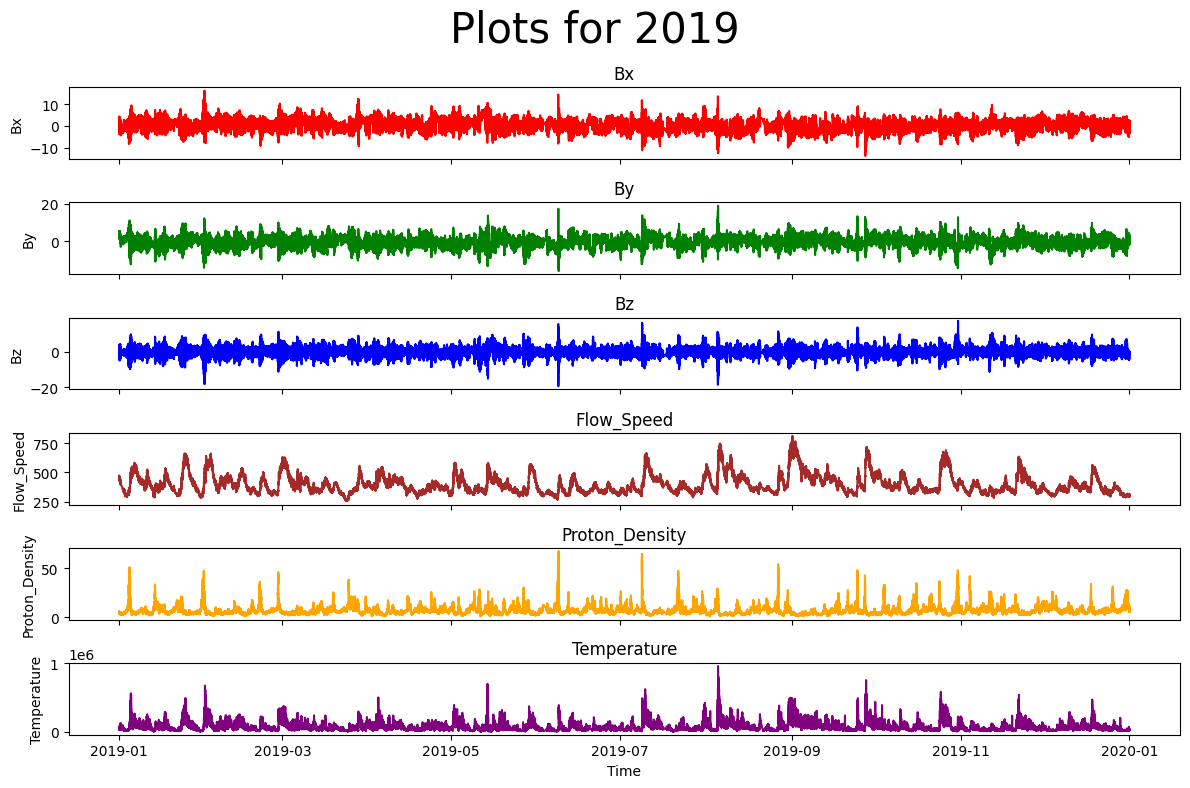

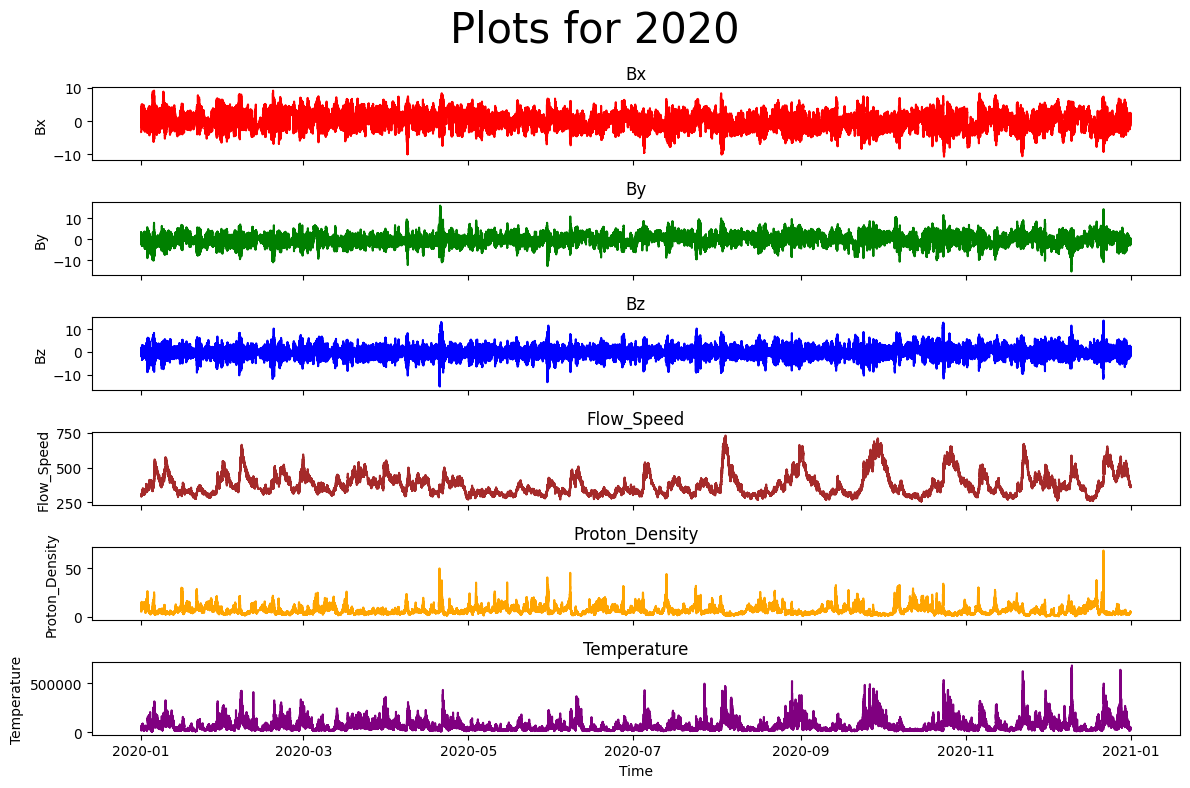

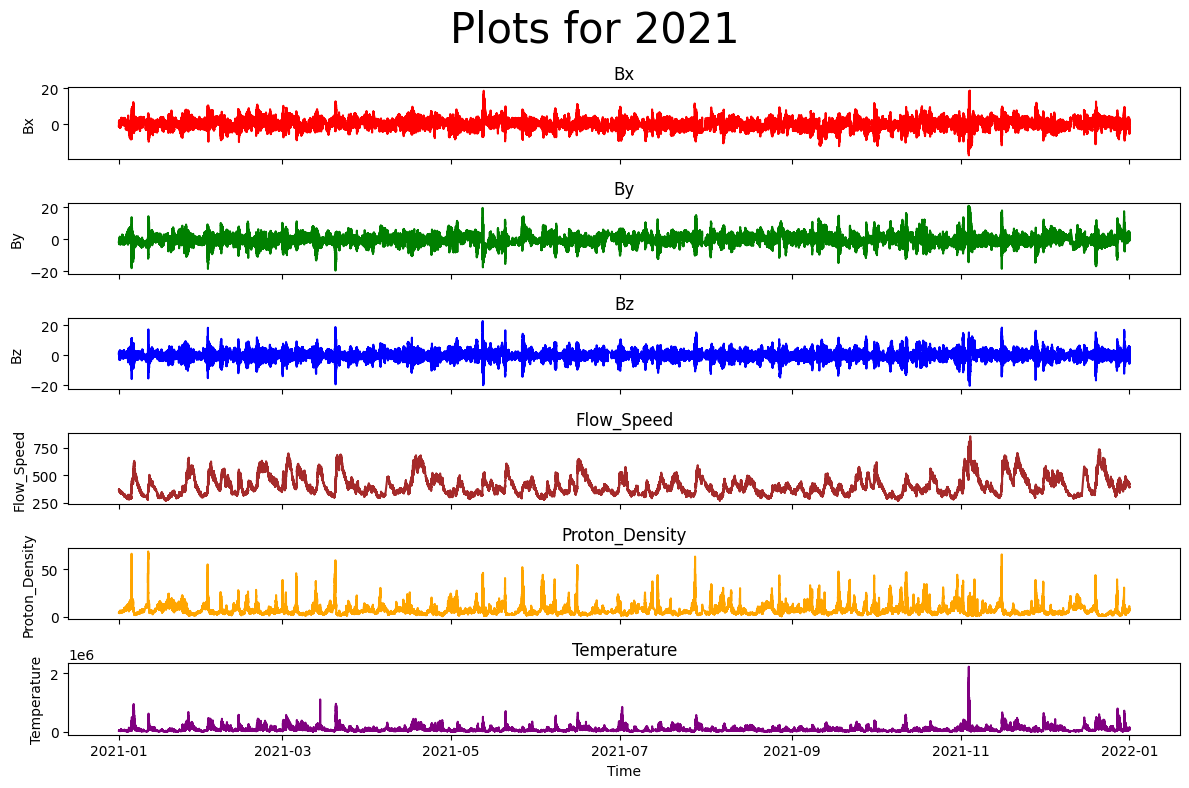

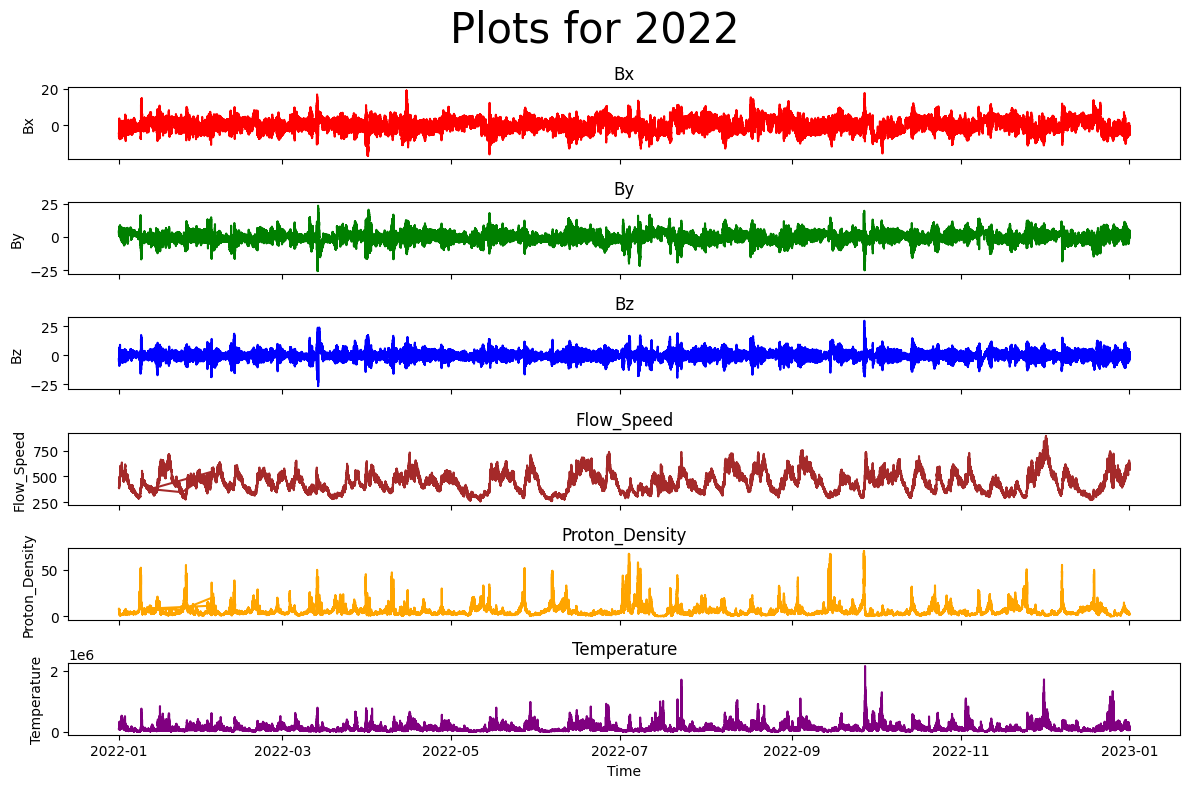

In [50]:
for year in range(2019,2023):


    # Create separate subplots for each line
    datacopy=data[data['Year']==year]
    fig, axs = plt.subplots(6, 1, figsize=(12, 8), sharex=True)
    fig.suptitle("Plots for " + str(year), fontsize=30)
    # Plot Bx
    axs[0].plot(datacopy['Time'], datacopy['Bx'], color='red')
    axs[0].set_ylabel('Bx')
    axs[0].set_title('Bx')

    # Plot By
    axs[1].plot(datacopy['Time'], datacopy['By'], color='green')
    axs[1].set_ylabel('By')
    axs[1].set_title('By')

    # Plot Bz
    axs[2].plot(datacopy['Time'], datacopy['Bz'], color='blue')
    axs[2].set_ylabel('Bz')
    axs[2].set_title('Bz')

    # Plot Flow_Speed
    axs[3].plot(datacopy['Time'], datacopy['Flow_Speed'], color='brown')
    axs[3].set_ylabel('Flow_Speed')
    axs[3].set_title('Flow_Speed')

    # Plot Proton_Density
    axs[4].plot(datacopy['Time'], datacopy['Proton_Density'], color='orange')
    axs[4].set_ylabel('Proton_Density')
    axs[4].set_title('Proton_Density')

    # Plot Temperature
    axs[5].plot(datacopy['Time'], datacopy['Temperature'], color='purple')
    axs[5].set_xlabel('Time')
    axs[5].set_ylabel('Temperature')
    axs[5].set_title('Temperature')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

# Plot the data for the period 2019-2022

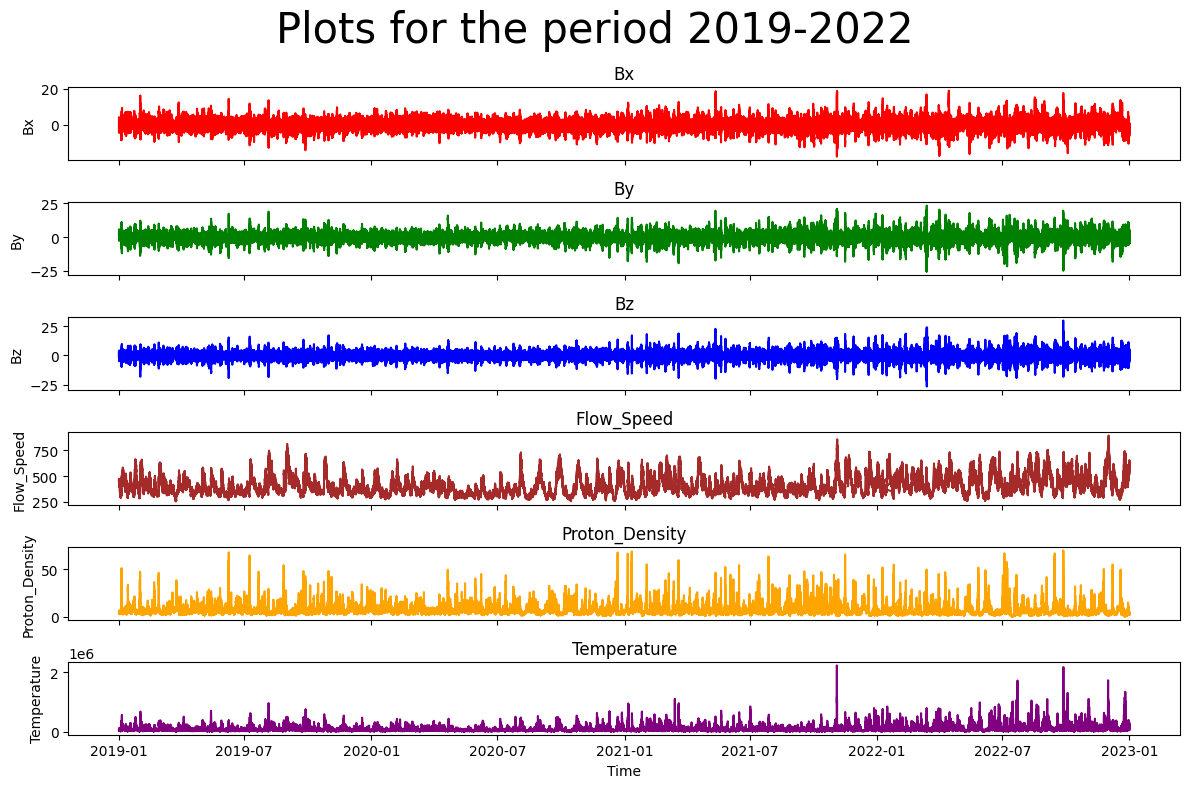

In [52]:
# Create separate subplots for each line

fig, axs = plt.subplots(6, 1, figsize=(12, 8), sharex=True)
fig.suptitle("Plots for the period 2019-2022", fontsize=30)
# Plot Bx
axs[0].plot(data['Time'], data['Bx'], color='red')
axs[0].set_ylabel('Bx')
axs[0].set_title('Bx')

# Plot By
axs[1].plot(data['Time'], data['By'], color='green')
axs[1].set_ylabel('By')
axs[1].set_title('By')

# Plot Bz
axs[2].plot(data['Time'], data['Bz'], color='blue')
axs[2].set_ylabel('Bz')
axs[2].set_title('Bz')

# Plot Flow_Speed
axs[3].plot(data['Time'], data['Flow_Speed'], color='brown')
axs[3].set_ylabel('Flow_Speed')
axs[3].set_title('Flow_Speed')

# Plot Proton_Density
axs[4].plot(data['Time'], data['Proton_Density'], color='orange')
axs[4].set_ylabel('Proton_Density')
axs[4].set_title('Proton_Density')

# Plot Temperature
axs[5].plot(data['Time'], data['Temperature'], color='purple')
axs[5].set_xlabel('Time')
axs[5].set_ylabel('Temperature')
axs[5].set_title('Temperature')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()